In [ ]:
'''
Developed by zee-1
'''

In [ ]:
!pip install numpy pandas matplotlib seaborn
!pip install alpha_vantage
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np            # for mathematical calculations
import pandas as pd           # for managing and storing
import seaborn as sns         # for creating different plots
from alpha_vantage.timeseries import TimeSeries # for getting data
import matplotlib.pyplot as plt # for creating different plots
import plotly.graph_objects as go # for creating interactive candle stick plot

In [ ]:
API_KEY = 'PUT-YOUR-API-KEY-HERE' # API Key

In [ ]:
class ScriptData:
  '''
  Methods:
    fetch_intraday_data: fetches the script data from alpha_vantage
        Args: script(str)
        Return: None
    convert_intraday_data: convert the script data to interpretable pandas dataframe
        Args: script(str)
        Return: None
  '''
  def __init__(self):
    # Initialize the class and setup the required parameters
    self.timeSeries = TimeSeries(key=API_KEY,output_format='pandas') # set API key and output_format
    self.data = dict()  # Create a dictionary to store price data of different scripts
    self.metaData = dict()  # Create a dictionary to store meta data of different scripts
    print('Initialized Successfully')

  def __getitem__(self,script):
    # override the default subscript operator to get stock data from the object
    if isinstance(script,list):
      dataToReturn = dict()
      for i in script:
        dataToReturn[i] = self.data[i]
      return dataToReturn
    elif isinstance(script,str):
      return self.data[script]
    else:
      raise Exception('Unknown value passed')
  def __setitem__(self,key,value):
    # override the default assignment operator to assign new data to the object
    if isinstance(key,str):
      self.data[key] = value
    elif isinstance(key,list):
      for k,v in zip(key,value):
        self.data[k] = v

  def __contains__ (self,script):
    # override the default 'in' membership operator get the membership of the arguement
    return script in self.data

  def fetch_intraday_data(self,script):
    # using get_intraday method of alpha_vantage API to get intra day data and storing it in class object
    self.data[script],self.metaData[script] = self.timeSeries.get_intraday(script)

  def convert_intraday_data(self,script):
    # Convert the fetched data to more interpretable pandas dataframe
    self.data[script]  = self.data[script].reset_index()
    self.data[script].columns = ['timestamp','open','high','low','close','volume']

In [ ]:
#create object
obj = ScriptData()


Initialized Successfully


In [ ]:
obj.fetch_intraday_data('GOOGL')  # reqeuest data
obj.convert_intraday_data('GOOGL')  # create dataframe
obj["GOOGL"]  # access data

,timestamp,open,high,low,close,volume
0,2023-02-10 20:00:00,94.590,94.690,94.580,94.6900,9188.0
1,2023-02-10 19:45:00,94.580,94.680,94.570,94.6300,11726.0
2,2023-02-10 19:30:00,94.600,94.640,94.580,94.6000,2659.0
3,2023-02-10 19:15:00,94.650,94.650,94.600,94.6200,1361.0
4,2023-02-10 19:00:00,94.590,94.660,94.560,94.6000,11623.0
...,...,...,...,...,...,...
95,2023-02-09 12:15:00,94.205,94.490,94.030,94.0350,3706851.0
96,2023-02-09 12:00:00,94.315,94.315,93.855,94.2000,5848135.0
97,2023-02-09 11:45:00,94.685,94.930,94.150,94.3200,5092623.0
98,2023-02-09 11:30:00,95.025,95.060,94.290,94.6801,4341475.0


In [ ]:
obj.fetch_intraday_data('AAPL') # request data
obj.convert_intraday_data('AAPL') # create dataframe
obj["AAPL"]   # access data

,timestamp,open,high,low,close,volume
0,2023-02-10 20:00:00,151.0700,151.2600,151.0700,151.2600,14365.0
1,2023-02-10 19:45:00,151.0300,151.0500,151.0100,151.0500,2982.0
2,2023-02-10 19:30:00,150.9900,151.0500,150.9900,151.0400,4900.0
3,2023-02-10 19:15:00,151.0000,151.0000,150.9700,150.9700,1792.0
4,2023-02-10 19:00:00,150.9900,151.0200,150.9900,151.0200,3685.0
...,...,...,...,...,...,...
95,2023-02-09 12:15:00,153.0070,153.3065,152.9271,153.1018,1206850.0
96,2023-02-09 12:00:00,152.9371,153.0179,152.6076,153.0069,1143984.0
97,2023-02-09 11:45:00,152.6574,153.0070,152.4977,152.9470,1642020.0
98,2023-02-09 11:30:00,153.1817,153.2566,152.4678,152.6375,1722898.0


In [ ]:
# membership test
print('GOOGL' in obj)
print('AAPL' in obj)
print('NVD' in obj)

True
True
False


### Create a Moving Average Indicator

In [ ]:
# find the moving average on the prices available
def indicator1(dataframe:pd.DataFrame,timeperiod:int):
  movingAvg = dataframe['close'].rolling(timeperiod).mean()
  return pd.DataFrame(dataframe['timestamp']).join(movingAvg)

In [ ]:
# a demonstration of moving average
indicator1(obj['GOOGL'],5)

,timestamp,close
0,2023-02-10 20:00:00,NaN
1,2023-02-10 19:45:00,NaN
2,2023-02-10 19:30:00,NaN
3,2023-02-10 19:15:00,NaN
4,2023-02-10 19:00:00,94.62800
...,...,...
95,2023-02-09 12:15:00,94.03100
96,2023-02-09 12:00:00,94.02100
97,2023-02-09 11:45:00,94.07500
98,2023-02-09 11:30:00,94.26502


In [ ]:
indicator1(obj['AAPL'],5)

,timestamp,close
0,2023-02-10 20:00:00,NaN
1,2023-02-10 19:45:00,NaN
2,2023-02-10 19:30:00,NaN
3,2023-02-10 19:15:00,NaN
4,2023-02-10 19:00:00,151.06800
...,...,...
95,2023-02-09 12:15:00,152.56398
96,2023-02-09 12:00:00,152.76164
97,2023-02-09 11:45:00,152.85070
98,2023-02-09 11:30:00,152.91460


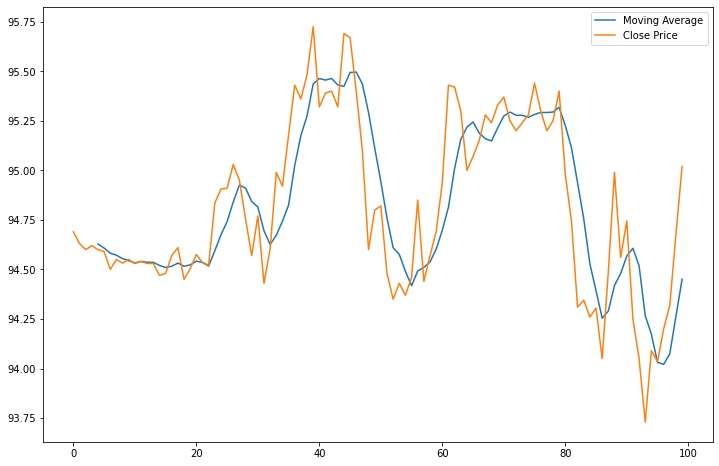

In [ ]:
# a plot to visualize the moving average and closing price
plt.figure(figsize=(12,8))
plt.plot(indicator1(obj['GOOGL'],5)['close'],label='Moving Average')
plt.plot(obj['GOOGL']['close'],label='Close Price')
plt.legend()


### Generating signals to BUY or SELL
To get the signal for BUY, SELL, NO_SIGNAL conditions are:

      > BUY (When: If indicator_data cuts close_data upwards)

      > SELL (When: If indicator_data cuts close_data downwards)

      > NO_SIGNAL (When: If indicator_data and close_data don’t cut each other)

In [ ]:
# define a class strategy to generate signals whether to buy or sell
class Strategy:
  '''
  Methods:
    get_script_data: requests the data of given script
                     Args: script (str)
                     return: None
    show_candle_stick_chart: create a candle stick chart for the given script
                     Args: None
                     Return: None
    get_signal: Use the moving average and closing price to generate signal whether to buy or sell
  '''
  def __init__(self,script:str):
    self.script = script
    self.dataFrame = ScriptData()
    self.movingAvg = None


  def get_script_data(self):
    # Fill up the datastructures with data

    self.dataFrame.fetch_intraday_data(self.script)
    self.dataFrame.convert_intraday_data(self.script)
    self.movingAvg = indicator1(self.dataFrame[self.script],timeperiod=5)


  def show_candle_stick_chart(self):
    # create a candle stick chart using plotly
    fig = go.Figure(data=[go.Candlestick(x=self.dataFrame[self.script]['timestamp'],
                open=self.dataFrame[self.script]['open'],
                high=self.dataFrame[self.script]['high'],
                low=self.dataFrame[self.script]['low'],
                close=self.dataFrame[self.script]['close'])])

    fig.show()
  def get_signals(self,raw=False):
    # putting closing price and moving average together

    df = pd.DataFrame(self.movingAvg['close'].values,columns=['closing_avg'])
    df = df.join(pd.DataFrame(self.dataFrame[self.script]['close'])).fillna(0)
    df = df.join(pd.DataFrame(self.dataFrame[self.script]['timestamp']))
    '''
      To get the signal for BUY, SELL, NO_SIGNAL conditions are:
      > BUY (When: If indicator_data cuts close_data upwards)
      > SELL (When: If indicator_data cuts close_data downwards)
      > NO_SIGNAL (When: If indicator_data and close_data don’t cut each other)

      For a dummy array:
        movingAvg = [a, b, c, d, e, f]
        closing   = [u, v, w, x, y, z]

      BUY if a > u (which means the moving average was above the closing price)
      and (not b>v)
       (which means moving average crosses the closing price, if b is stil less than closing,
       closing will simply lie blow the moving average which is a no signal conditon)

      SELL if a < u (which means the moving average was below the closing price)
      and (not b < v)
      (which means moving average crosses the closing price, if b is stil more than closing,
       closing will simply lie above the moving average which is a no signal conditon)

    '''
    array = df.values
    signal = ['NO SIGNAL']
    for i in range(1,array.shape[0]):
      a,u = array[i-1][0],array[i-1][1]
      b,v = array[i][0],array[i][1]
      if a < u :        #checking buy signal
        if not (b < v):
          signal.append('BUY')
        else:
          signal.append('NO SIGNAL')
      elif a > u:       # checking Sell signal
        if not (b > v):

          signal.append('SELL')
        else:

          signal.append('NO SIGNAL')
      else:             # otherwise throw a no signal
        signal.append('NO SIGNAL')
    df['signal'] = signal
    if raw:
      return df[df['signal']!= 'NO SIGNAL']
    return df[['timestamp','signal']][df['signal']!= 'NO SIGNAL']

In [ ]:
strat = Strategy('GOOGL')
strat.get_script_data()
signals = strat.get_signals(raw=True)

Initialized Successfully


In [ ]:
signals

,closing_avg,close,timestamp,signal
4,94.62800,94.6000,2023-02-10 19:00:00,BUY
9,94.54438,94.5500,2023-02-10 17:45:00,SELL
10,94.53240,94.5301,2023-02-10 17:30:00,BUY
16,94.51610,94.5700,2023-02-10 16:00:00,SELL
18,94.51610,94.4500,2023-02-10 15:30:00,BUY
20,94.54204,94.5752,2023-02-10 15:00:00,SELL
21,94.53504,94.5350,2023-02-10 14:45:00,BUY
22,94.51740,94.5218,2023-02-10 14:30:00,SELL
28,94.91018,94.7550,2023-02-10 13:00:00,BUY
33,94.67300,94.9900,2023-02-10 11:45:00,SELL


In [ ]:
signals['signal'].value_counts()

BUY     13
SELL    13
Name: signal, dtype: int64

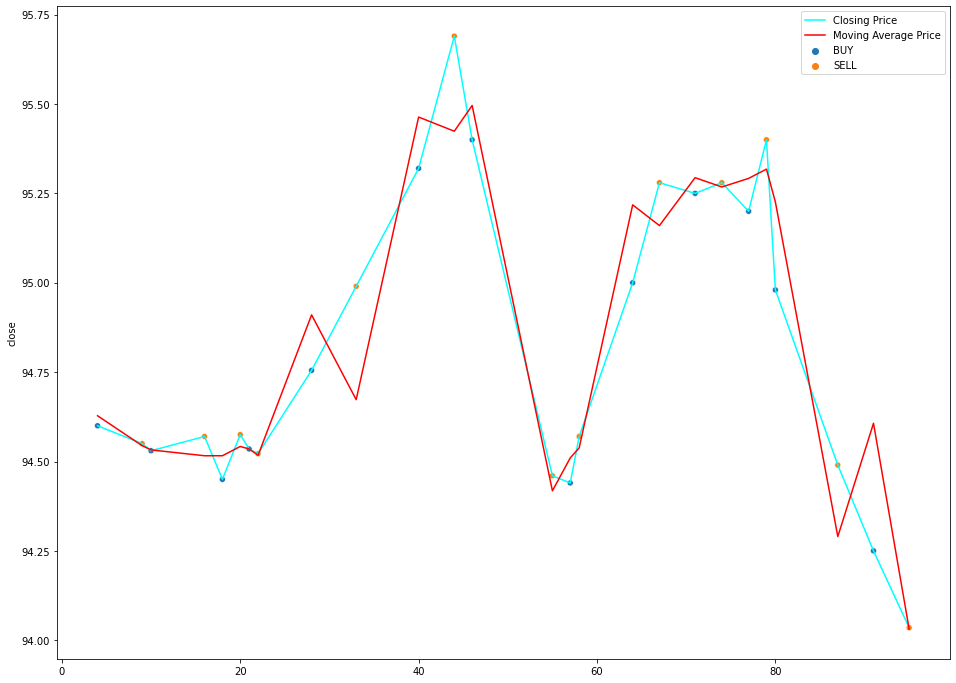

In [ ]:
'''
A plot to demonstrate the predicted signals
'''
plt.figure(figsize=(16,12))

sns.scatterplot(data =signals[:] ,x=signals.index,y='close',hue='signal')
plt.plot(signals['close'][:],color='cyan',label = 'Closing Price')
plt.plot(signals['closing_avg'][:],color='red',label = 'Moving Average Price')
plt.legend()

In [ ]:
strat.show_candle_stick_chart()